# Dyanmic Programing Problem2

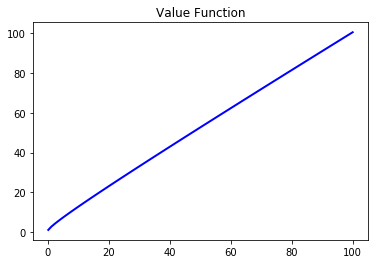

Time cost:  0.7500011920928955


In [3]:
#2.Solve the nonstochastic version of the problem above where the firm receives $zl=1$ forever
import numpy as np
import matplotlib.pyplot as plt
import time

start_time = time.time()

beta = 0.95
theta = 0.5
delta = 0.1
num_points = 100
tol = 10**(-5)
z = 1
k_vec = np.reshape(np.linspace(0.1,100,num_points),num_points)
fk = z*k_vec**theta+(1-delta)*k_vec
kprime = fk-0.05
old_value = np.ones(num_points)
new_value = np.zeros(num_points)
policy = np.zeros(num_points)
ctr = 0
while(np.max(np.abs(old_value-new_value)) > tol):
    np.copyto(old_value,new_value)
    for i in np.arange(num_points):
        new_value[i] = np.max(fk[i]-kprime[kprime<=fk[i]]+beta*old_value[kprime<=fk[i]])
        policy[i] = np.argmax(fk[i]-kprime[kprime<=fk[i]]+beta*old_value[kprime<=fk[i]])
    ctr = ctr+1

fig,ax = plt.subplots()
ax.plot(k_vec, new_value,'b',linewidth=2,)
ax.set_title('Value Function')
ax.legend()
plt.show()

end_time = time.time()
run_time = end_time-start_time
print('Time cost: ', run_time )

250


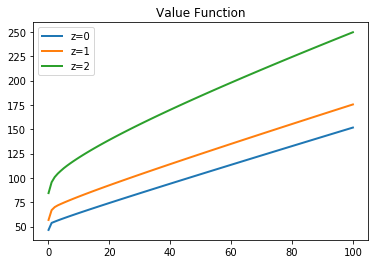

Time elapsed:  0:00:05.000008


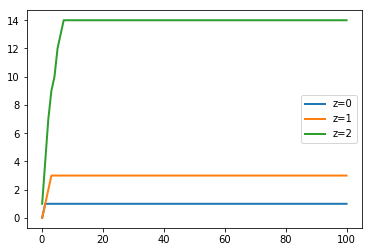

In [2]:
#3.Solve the problem as stated above and plot the value function over KK for each element of Z
#4.Plot the decision rules
#5.Simulate an example firm for 100 periods
#6.Speed up the code and report the time improvement
import numpy as np
import matplotlib.pyplot as plt
import datetime

start_time = datetime.datetime.now()

beta = 0.95
theta = 0.5
delta = 0.1
num_points = 100
tol = 10**(-5)
z = 1
k_vec = np.reshape(np.linspace(0.1,100,num_points),num_points)
f = lambda k,z,theta,delta:z*k**theta+(1-delta)*k

trans_mat = np.array([[0.9,0.05,0.05],[0.15,0.7,0.15],[0.1,0.1,0.8]])
z = np.array([1,2,7])

N = np.shape(trans_mat)[0]
value_old = np.ones([num_points,N])
value_new = np.zeros([num_points,N])
policy = np.zeros([num_points,N])
ctr = 0

fk = np.zeros([num_points,N])
for ii in range(N):
    fk[:,ii] = f(k_vec,z[ii],theta,delta)
kprime = np.linspace(np.min(fk),np.max(fk),num_points)-0.05

while(np.max(np.abs(value_old-value_new)) > tol):
    np.copyto(value_old,value_new)
    for ii in np.arange(num_points):
        for jj in np.arange(N):
            value_new[ii,jj] = np.max(fk[ii,jj]-kprime[kprime<=fk[ii,jj]]+beta*np.dot(value_old[kprime<=fk[ii,jj],:],trans_mat[jj,:]))
            policy[ii,jj] = np.argmax(fk[ii,jj]-kprime[kprime<=fk[ii,jj]]+beta*np.dot(value_old[kprime<=fk[ii,jj],:],trans_mat[jj,:]))
    ctr = ctr+1

print(ctr)

#Plot the value function
fig,ax = plt.subplots()
for ii in np.arange(N):
    ax.plot(k_vec,value_new[:,ii],label='z='+str(ii),linewidth=2)
ax.set_title('Value Function')
ax.legend(loc='best')
plt.show()

end_time = datetime.datetime.now()
run_time = end_time - start_time
print('Time elapsed: ', run_time)

#Plot the decision rule
fig, ax=plt.subplots()
for ii in np.arange(N):
    ax.plot(k_vec,policy[:,ii],label='z='+str(ii),linewidth=2)
ax.legend(loc='best')
plt.show()